In [2]:
import numpy as np
import pandas as pd
import re
import pickle

from textblob import TextBlob
from wordcloud import WordCloud

#plotting tools
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tweets_train = pd.read_csv("/content/drive/MyDrive/Datasets/Toxic tweets dataset/train.csv")
tweets_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
print(tweets_train['comment_text'])

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object


In [5]:
#test set
tweets_test = pd.read_csv("/content/drive/MyDrive/Datasets/Toxic tweets dataset/test.csv")
tweets_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
tweets_test.shape

(153164, 2)

In [7]:
#test labels
test_labels = pd.read_csv("/content/drive/MyDrive/Datasets/Toxic tweets dataset/test_labels.csv");
test_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [8]:
pd.set_option('display.max_colwidth', None)
tweets_train['comment_text'].sample(5)

108953                                                                                  MORIHAMER wins over rajya srivijaya \n\n...hindi indi multi kulti brownies deserve eternal barring from the Land of Green Suns, these people are Short Men who invaded our homeworld MORIHAMER, their interplanetary imperialism originating from Surya Majapahit starsystem must be evaporated, even if The Eldest of the Tower Of Eternity would do that himself.
146721                                                                                                                                                                                                                                                                                                                    "\n\n Challenge ""special Nordic version of Germanic-Roman jurisprudence"" \n\nPlease see the talk page on ""Law of Sweden"".   "
151383                                                                                                          

In [9]:
labels = list(tweets_train.columns[2:])
labels

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [10]:
label = tweets_train[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]
print(label.head())

   toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0              0
1      0             0        0       0       0              0
2      0             0        0       0       0              0
3      0             0        0       0       0              0
4      0             0        0       0       0              0


### Multi-labelled data


In [11]:
cnt1 = 0
cnt2 = 0

for i in range(label.shape[0]):
  cnt = np.count_nonzero(label.iloc[i])
  if cnt:
    cnt1+=1
  if cnt>1:
    cnt2+=1

print(cnt1)
print(cnt2)
print(tweets_train.shape[0] - (cnt1+cnt2))

16225
9865
133481


### Length of comments

average length of comment: 394.073


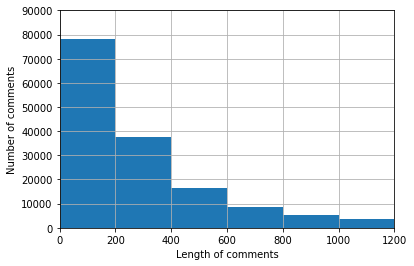

In [12]:
x = [len(tweets_train['comment_text'][i]) for i in range(tweets_train['comment_text'].shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)))

bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()


In [13]:
label.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


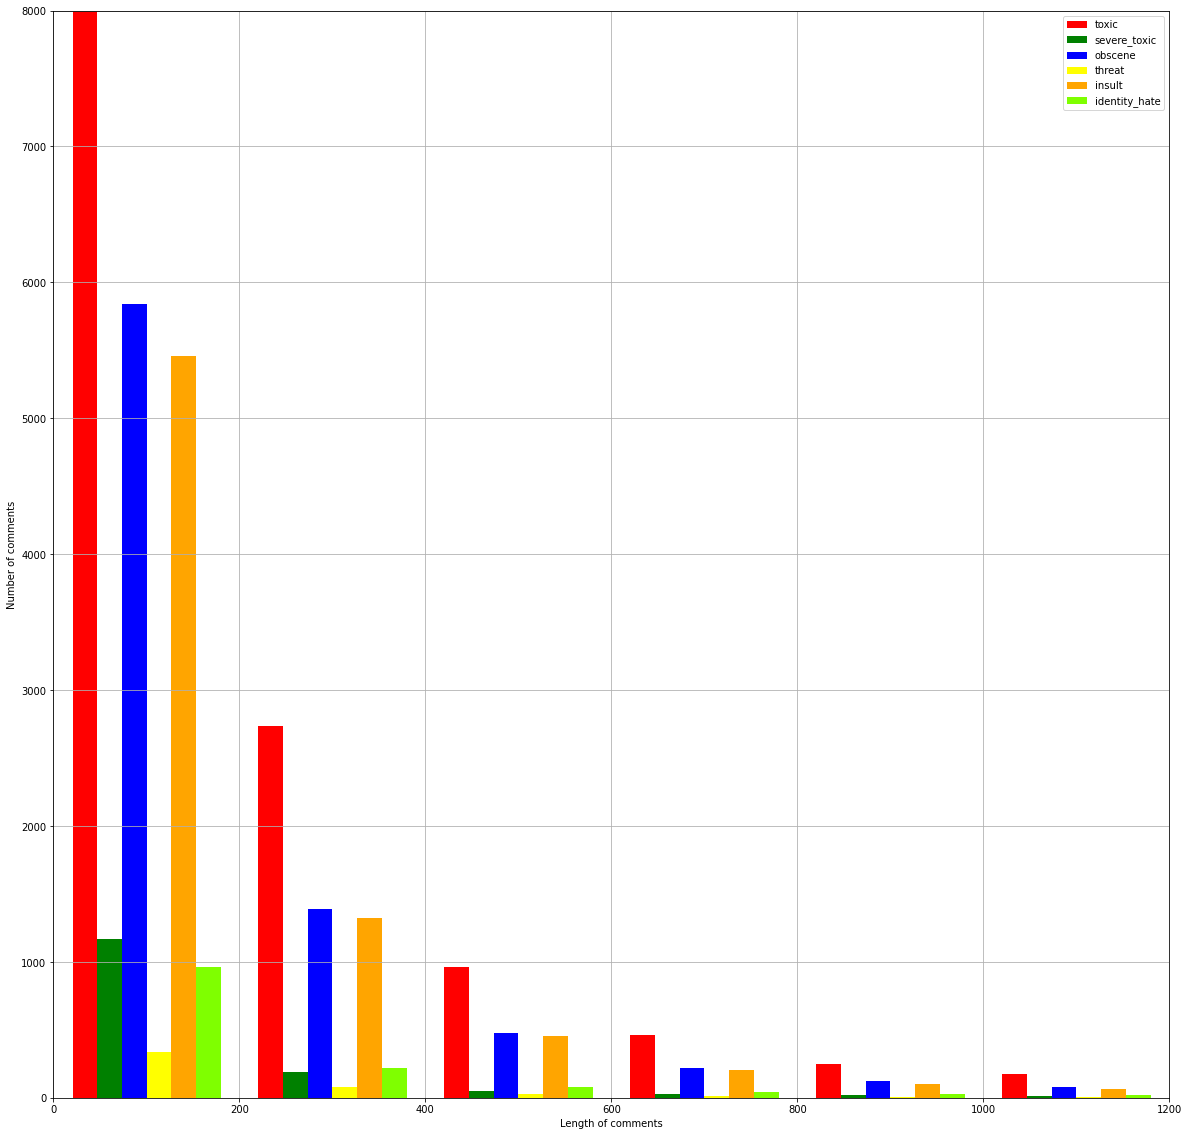

In [14]:
y = np.zeros(label.shape)
for ix in range(tweets_train['comment_text'].shape[0]):
    l = len(tweets_train['comment_text'][ix])
    if label['toxic'].iloc[ix] :
        y[ix][0] = l
    if label['severe_toxic'].iloc[ix] :
        y[ix][1] = l
    if label['obscene'].iloc[ix] :
        y[ix][2] = l
    if label['threat'].iloc[ix] :
        y[ix][3] = l
    if label['insult'].iloc[ix] :
        y[ix][4] = l
    if label['identity_hate'].iloc[ix] :
        y[ix][5] = l

labelsplit = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

color = ['red','green','blue','yellow','orange','chartreuse']  
plt.figure(figsize=(20,20))
plt.hist(y,bins = bins,label = labelsplit,color = color)
plt.axis([0, 1200, 0, 8000])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments') 
plt.legend()
plt.grid(True)
plt.show()

<BarContainer object of 6 artists>

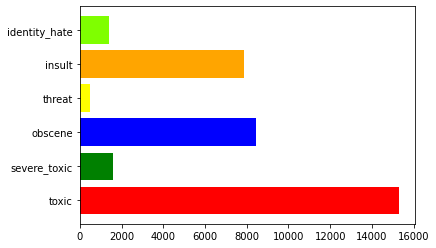

In [15]:
plt.barh(labelsplit, tweets_train[labels].sum(axis=0), color = color)

In [16]:
tweets_train[labels].sum(axis= 0)

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

## Tokenization of data

In [17]:
import re
import nltk
nltk.download("popular")
# import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [18]:
import string
import html

### Text Preprocessing

In [19]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))

# def remove_contractions(sent):
#     # creating an empty list
#     expanded_words = []   
#     for word in sent.split(" "):
#       # using contractions.fix to expand the shortened words
#         expanded_words.append(contractions.fix(word)) 

#     return ' '.join(expanded_words)

def to_lowercase(text):
    return text.lower()



def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words, stop_words):
    """
    :param words:
    :type words:
    :param stop_words: from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    or
    from spacy.lang.en.stop_words import STOP_WORDS
    :type stop_words:
    :return:
    :rtype:
    """
    return [word for word in words if word not in stop_words]


def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
    return word_tokenize(text)

def clean_text( text):
    # text = remove_contractions(text)
    text = remove_special_chars(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

tweets_train['comment_text'] = tweets_train['comment_text'].apply(lambda x: clean_text(x))
tweets_train.sample(1)['comment_text'].values[0]

'insert reason unblock'

In [20]:
tweets_test['comment_text'] = tweets_test['comment_text'].apply(lambda x: clean_text(x))

# Bag of Words

In [21]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer  
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model

tok = Tokenizer(num_words = 1000, oov_token='UNK')

tok.fit_on_texts(tweets_train['comment_text'])

x_train = tok.texts_to_sequences(tweets_train['comment_text'])
x_test = tok.texts_to_sequences(tweets_test['comment_text'])

In [22]:
vocab_inp_size = len(tok.word_index) + 1
print(vocab_inp_size)

208757


## LSTM

In [58]:
maxlen = max([len(t) for t in x_train])
print(maxlen)

training_padded = pad_sequences(x_train,
                                maxlen = 50,
                                truncating = 'post',
                                padding = 'post')

testing_padded = pad_sequences(x_test,
                               maxlen = 50,
                               truncating = 'post',
                               padding = 'post')

1250


array([[470,   4,   8, ...,   0,   0,   0],
       [  1, 866,   1, ...,   0,   0,   0],
       [325, 315,  24, ...,   0,   0,   0],
       ...,
       [  1,   1, 281, ...,   0,   0,   0],
       [ 37,  12, 138, ...,   0,   0,   0],
       [ 78,  14,  13, ...,   0,   0,   0]], dtype=int32)

In [24]:
model = models.Sequential()
model.add(layers.Embedding(vocab_inp_size, 128, input_length=50))
model.add(layers.LSTM(512, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(layers.LSTM(128, dropout=0.2,recurrent_dropout=0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(6, activation='sigmoid'))

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adamax',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 128)           26720896  
                                                                 
 lstm (LSTM)                 (None, 50, 512)           1312768   
                                                                 
 lstm_1 (LSTM)               (None, 128)               328192    
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dense_1 (Dense)             (None, 6)                 102       
                                                                 
Total params: 28,364,022
Trainable params: 28,364,022
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(training_padded,
                    tweets_train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']],
                    epochs = 5,
                    batch_size = 512,
                    validation_split = 0.2
                    )

Epoch 1/5
250/250 [==============================] - 182s 698ms/step - loss: 0.1670 - accuracy: 0.9790 - val_loss: 0.1412 - val_accuracy: 0.9941
Epoch 2/5
250/250 [==============================] - 140s 558ms/step - loss: 0.1412 - accuracy: 0.9942 - val_loss: 0.1410 - val_accuracy: 0.9941
Epoch 3/5
250/250 [==============================] - 205s 820ms/step - loss: 0.1412 - accuracy: 0.9942 - val_loss: 0.1409 - val_accuracy: 0.9941
Epoch 4/5
250/250 [==============================] - 132s 527ms/step - loss: 0.1412 - accuracy: 0.9942 - val_loss: 0.1409 - val_accuracy: 0.9941
Epoch 5/5
250/250 [==============================] - 229s 917ms/step - loss: 0.1412 - accuracy: 0.9942 - val_loss: 0.1409 - val_accuracy: 0.9941


In [26]:
history_dict = history.history
history_dict.keys()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

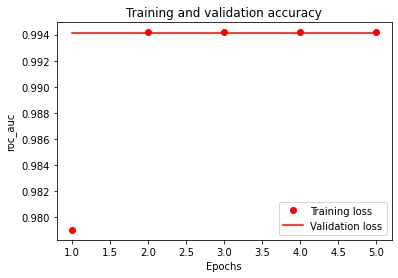

In [27]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'ro', label='Training loss')
plt.plot(epochs, val_acc, 'r', label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('roc_auc')
plt.legend()

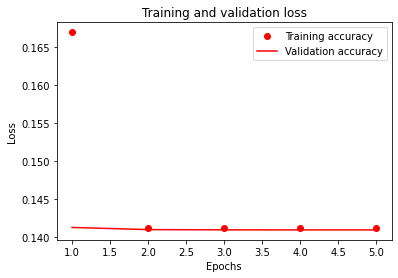

In [28]:
plt.plot(epochs, loss, 'ro', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## Bidirectional LSTM

In [29]:
lstm_dim = 32
model_bilstm = models.Sequential()
model_bilstm.add(layers.Embedding(vocab_inp_size, 512, input_length=50))
model_bilstm.add(layers.Bidirectional(layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model_bilstm.add(layers.Flatten())
model_bilstm.add(layers.Dense(16, activation='relu'))
model_bilstm.add(layers.Dense(6, activation='sigmoid'))

model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

model_bilstm.summary()

history = model_bilstm.fit(training_padded,
                           tweets_train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']],
                           epochs = 5,
                           batch_size = 512,
                           validation_split = 0.2
                           )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 512)           106883584 
                                                                 
 bidirectional (Bidirectiona  (None, 50, 256)          656384    
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense_2 (Dense)             (None, 16)                204816    
                                                                 
 dense_3 (Dense)             (None, 6)                 102       
                                                                 
Total params: 107,744,886
Trainable params: 107,744,886
Non-trainable params: 0
________________________________________

In [30]:
history_dict = history.history
history_dict.keys()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

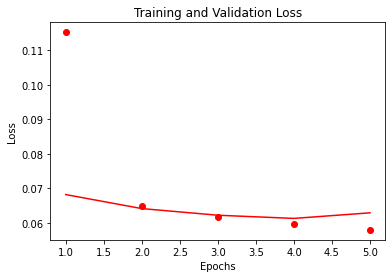

In [32]:
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend
plt.show()

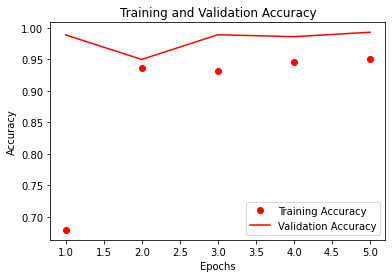

In [33]:
plt.plot(epochs, acc, 'ro', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Gated Recurrent Units LSTM

In [61]:
model_gru = models.Sequential()
model_gru.add(layers.Embedding(1000, 20, input_length=maxlen))
model_gru.add(layers.Bidirectional(layers.GRU(64)))
model_gru.add(layers.Flatten())
model_gru.add(layers.Dropout(0.1))
model_gru.add(layers.Dense(6, activation='sigmoid'))

# Set the training parameters
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_gru.summary()

#model_gru is giving shape error

# history = model_gru.fit(training_padded,
#                         tweets_train[['toxic' ,'severe_toxic' ,'obscene' ,'threat' ,'insult' ,'identity_hate']],
#                         epochs=5,
#                         batch_size=128,
#                         validation_split=0.2
#                         )

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 1250, 20)          20000     
                                                                 
 bidirectional_16 (Bidirecti  (None, 128)              33024     
 onal)                                                           
                                                                 
 flatten_16 (Flatten)        (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 6)                 774       
                                                                 
Total params: 53,798
Trainable params: 53,798
Non-trainable params: 0
_________________________________________________

In [46]:
history_dict = history.history
history_dict.keys()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

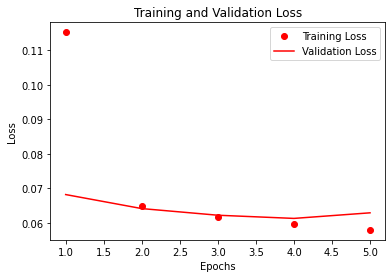

In [47]:
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

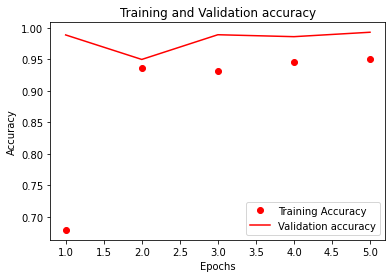

In [50]:
plt.plot(epochs, acc, 'ro', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [70]:
df_sample = pd.read_csv("/content/drive/MyDrive/Datasets/Toxic tweets dataset/sample_submission.csv")
df_sample.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [71]:
y_pred = model_bilstm.predict(testing_padded)
df_sample[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]] = y_pred
df_sample.to_csv('submission.csv', index=False)

In [67]:
y_pred

array([[9.9786937e-01, 4.0897086e-01, 9.7573835e-01, 2.7786055e-01,
        9.6137375e-01, 2.3031923e-01],
       [1.9934036e-02, 3.2747019e-05, 1.9678215e-03, 2.1470690e-04,
        5.1015918e-03, 5.0553295e-04],
       [3.1048605e-02, 3.5198136e-05, 1.9519150e-03, 2.7851327e-04,
        8.0989301e-03, 5.2514620e-04],
       ...,
       [1.0304939e-02, 8.0449399e-06, 8.1978599e-04, 5.5049466e-05,
        2.1706964e-03, 1.8149716e-04],
       [3.0185342e-02, 1.0176841e-04, 3.5109746e-03, 3.9863907e-04,
        8.9350482e-03, 1.1712596e-03],
       [8.6623728e-01, 1.0011907e-02, 7.4632585e-01, 8.9086499e-03,
        2.2091381e-01, 1.5610098e-02]], dtype=float32)